In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
gadded = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_goals-added_players_2025-02-20.csv")
salaries = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_salaries_players_2025-02-20.csv")
xg = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xgoals_players_2025-02-20.csv")
xpass = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xpass_players_2025-02-20.csv")
gadded_ptfc25 = pd.read_csv("Data/american_soccer_analysis_mls_goals-added_players_2025-02-24.csv")

In [4]:
gadd_salaries = gadded.merge(salaries[['Player','Base Salary','Guaranteed Compensation']],on="Player").drop('Unnamed: 0',axis = 1)

In [5]:
ptfc_df = gadd_salaries[gadd_salaries['Team'] == 'POR']
ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)
ptfc_df.columns

/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_58311/3874775441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)


Index(['Player', 'Team', 'Season', 'Position', 'Minutes', 'Dribbling',
       'Fouling', 'Interrupting', 'Passing', 'Receiving', 'Shooting',
       'Goals Added', 'Base Salary', 'Guaranteed Compensation',
       'Base Salary Number'],
      dtype='object')

In [6]:
ptfc_df = ptfc_df.sort_values('Base Salary Number',ascending = True)


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_58311/2341280444.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')


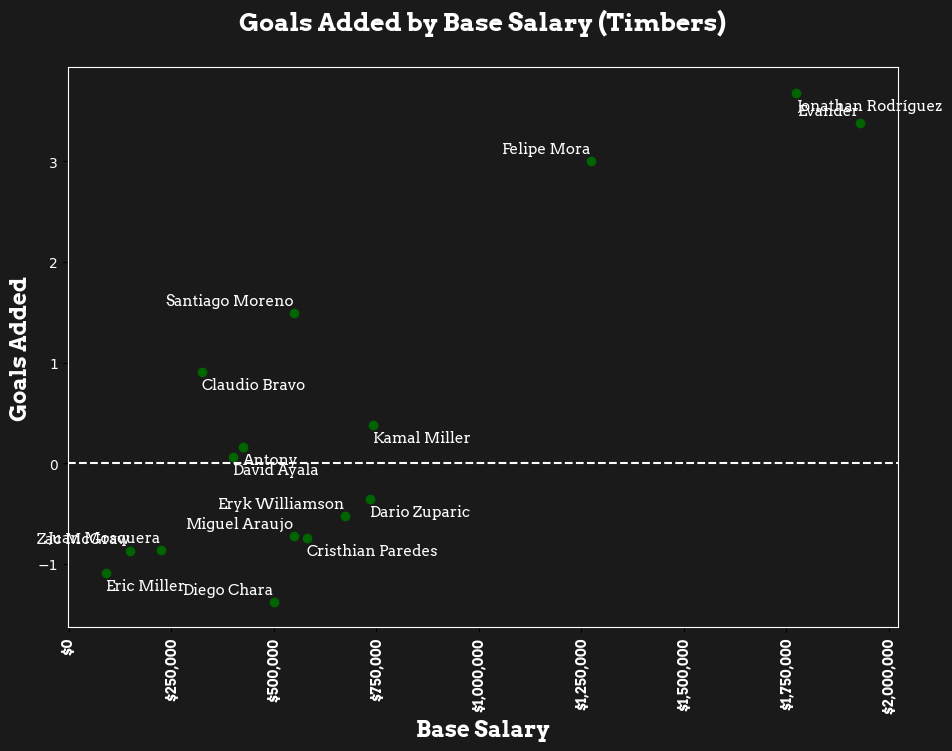

In [55]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.1, right=0.93, top=0.9, bottom=0.2)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')


plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')

# Add labels for each point
# Add labels for each point with slight offset
for i in range(len(ptfc_df)):
    plt.text(
        ptfc_df.iloc[i]['Base Salary Number'] + (0.05 if i % 2 == 1 else -0.05), 
        ptfc_df.iloc[i]['Goals Added'] + (0.05 if i % 2 == 1 else -0.05),   # Offset y by 0.05
        ptfc_df.iloc[i]['Player'],
        fontsize=11,
        ha='right' if i % 2 == 1 else 'left',
        va='bottom' if i % 2 == 1 else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'white'
    )

plt.axhline(y=0, color='white', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel('Base Salary', color='white', fontproperties=font_props,size = 16)
plt.ylabel('Goals Added', color='white', fontproperties=font_props,size = 16)
plt.xticks(rotation=90, color='white',fontproperties = font_props)
# Format the x-axis to display full numbers (instead of scientific notation)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))  # Format as currency with commas

plt.yticks(color='white')

plt.title('Goals Added by Base Salary (Timbers)\n',color = 'white',
          fontproperties = font_props,size = 18)

# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border



plt.savefig('timbers_salary_gadd.png',dpi = 700)


In [69]:
mapping = {'CB':0,'FB':1,'DM':2,'CM':2,'AM':3,'W':4,'ST':5}



ptfc_df['Defensive Actions'] = ((ptfc_df['Interrupting'] + ptfc_df['Fouling'])/ ptfc_df['Minutes']) * 90
ptfc_df['PositionCode'] = ptfc_df['Position'].map(mapping)
ptfc_df = ptfc_df.sort_values("PositionCode")
ptfc_df = ptfc_df[ptfc_df['Minutes'] > 200]

ptfc_2025_df = gadded_ptfc25
ptfc_2025_df.loc[ptfc_2025_df['Player'] == 'David Pereira Da Costa','Position'] = 'AM'
ptfc_2025_df['Defensive Actions'] = ((ptfc_2025_df['Interrupting'] + ptfc_2025_df['Fouling'])/ ptfc_2025_df['Minutes']) * 90
ptfc_2025_df['PositionCode'] = ptfc_2025_df['Position'].map(mapping)
ptfc_2025_df = ptfc_2025_df.sort_values("PositionCode")

x_labels = ['CB','FB','CM','AM','W','ST']
print(ptfc_2025_df["Position"].unique())

['CB' 'FB' 'CM' 'AM' 'W' 'ST']


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_58311/1422618129.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_df["PositionCode"],ptfc_df['Defensive Actions'],'ro',color = 'darkgreen')
/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_58311/1422618129.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_2025_df["PositionCode"],ptfc_2025_df['Defensive Actions'],'ro',color='gold')


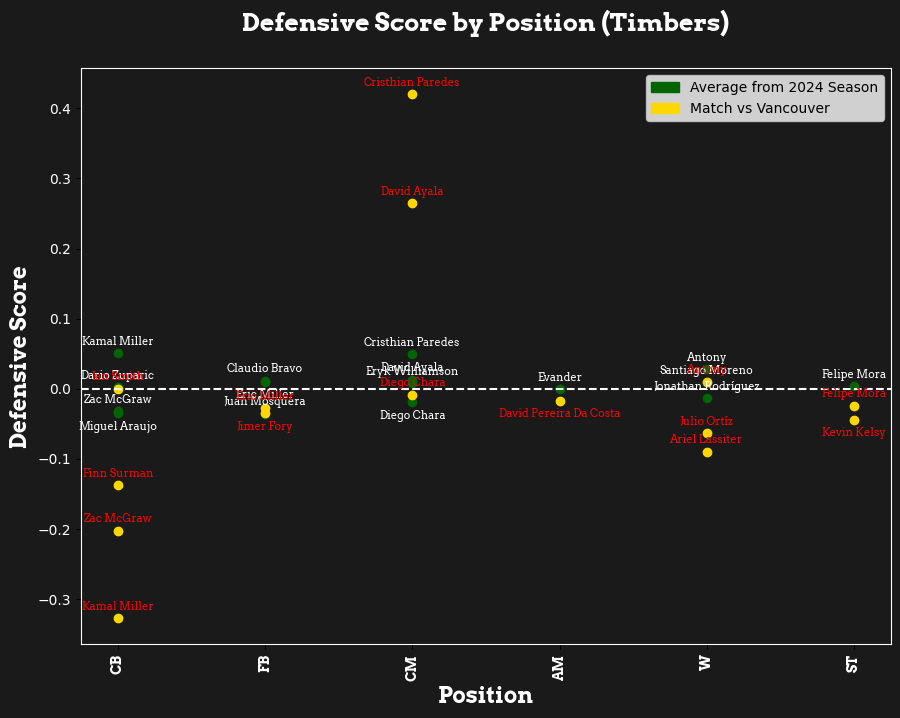

In [73]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.12, right=0.93, top=0.87, bottom=0.15)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')

# Last year per 90
plt.plot(ptfc_df["PositionCode"],ptfc_df['Defensive Actions'],'ro',color = 'darkgreen')
# This season per 90
plt.plot(ptfc_2025_df["PositionCode"],ptfc_2025_df['Defensive Actions'],'ro',color='gold')


# Add labels for each point
# Add labels for each point with slight offset
for i in range(len(ptfc_df)):
    name = ptfc_df.iloc[i]['Player']
    other_players = ((name == 'Miguel Araujo') or (name == 'Eric Miller') or (name == 'Diego Chara'))
    plt.text(
        ptfc_df.iloc[i]['PositionCode'], 
        ptfc_df.iloc[i]['Defensive Actions'] + (0.008 if not other_players else -0.01),   # Offset y by 0.05
        ptfc_df.iloc[i]['Player'],
        fontsize=8,
        ha='center',
        va='bottom' if not other_players else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'white'
    )

for i in range(len(ptfc_2025_df)):
    name = ptfc_2025_df.iloc[i]['Player']
    other_players = name == 'David Pereira Da Costa' or name == 'Jimer Fory' or name =='Kevin Kelsy'
    plt.text(
        ptfc_2025_df.iloc[i]['PositionCode'], 
        ptfc_2025_df.iloc[i]['Defensive Actions'] + (0.008 if not other_players else -0.01),   # Offset y by 0.05
        ptfc_2025_df.iloc[i]['Player'],
        fontsize=8,
        ha='center',
        va='bottom' if not other_players else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'red'
    )

plt.axhline(y=0, color='white', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel('Position', color='white', fontproperties=font_props,size = 16)
plt.ylabel('Defensive Score', color='white', fontproperties=font_props,size = 16)
ax.set_xticks(ptfc_df['PositionCode'].unique())  # Set correct x-tick positions
ax.set_xticklabels(x_labels, rotation=90, color='white', fontproperties=font_props)

plt.yticks(color='white')

plt.title('Defensive Score by Position (Timbers)\n',color = 'white',
          fontproperties = font_props,size = 18)

# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border

# Manually create legend based on colors
red_patch = mpatches.Patch(color='darkgreen', label='Average from 2024 Season')
blue_patch = mpatches.Patch(color='gold', label='Match vs Vancouver')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

plt.savefig('timbers_defensive_score.png',dpi = 700)
